# Two thirds of the average game

## Replicator dynamics

$$
    f_i(x) = \frac{1}{1 + \left(i - \frac{2}{3}\sum_{i=0}^{N}ix_i\right) ^ 2}
$$

In [1]:
import numpy as np
import scipy.integrate

import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})

def get_uniform_population(N=101):
    """
    Obtain a uniform population distribution for a given population size.
    """
    return np.ones(N) / (N)

In [2]:
assert np.array_equal(get_uniform_population(N=2), np.array((1, 1)) / 2)
assert np.array_equal(get_uniform_population(), np.ones(101) / 101)

In [3]:
def get_distance_from_two_thirds(x):
    """
    Obtain the distance (for the metric equivalent to the objective function)
    for a given vector x to 2/3rds of the mean of x.
    """
    N = len(x)
    indices = np.arange(0, N)

    return (indices - 2/3 * np.sum(indices * x)) ** 2

In [4]:
x = np.array((1/3, 1/3, 1/3))
assert np.allclose(get_distance_from_two_thirds(x), np.array([0.44444444, 0.11111111, 1.77777778]))

In [5]:
def get_fitness(x):            
    """
    Return the fitness vector f_i
    """
    return 1 / (1 + get_distance_from_two_thirds(x=x))

In [6]:
x = np.array((1/3, 1/3, 1/3))
assert np.allclose(get_fitness(x), np.array([0.69230769, 0.9       , 0.36      ]))

In [7]:
def get_derivative(x, t):
    """
    Return the derivative as defined by the replicator dynamics equation.
    """
    fitness = get_fitness(x=x)
    phi = np.sum(x * fitness)

    return x * (fitness - phi)


A plot of the behaviour with a uniform initial population:

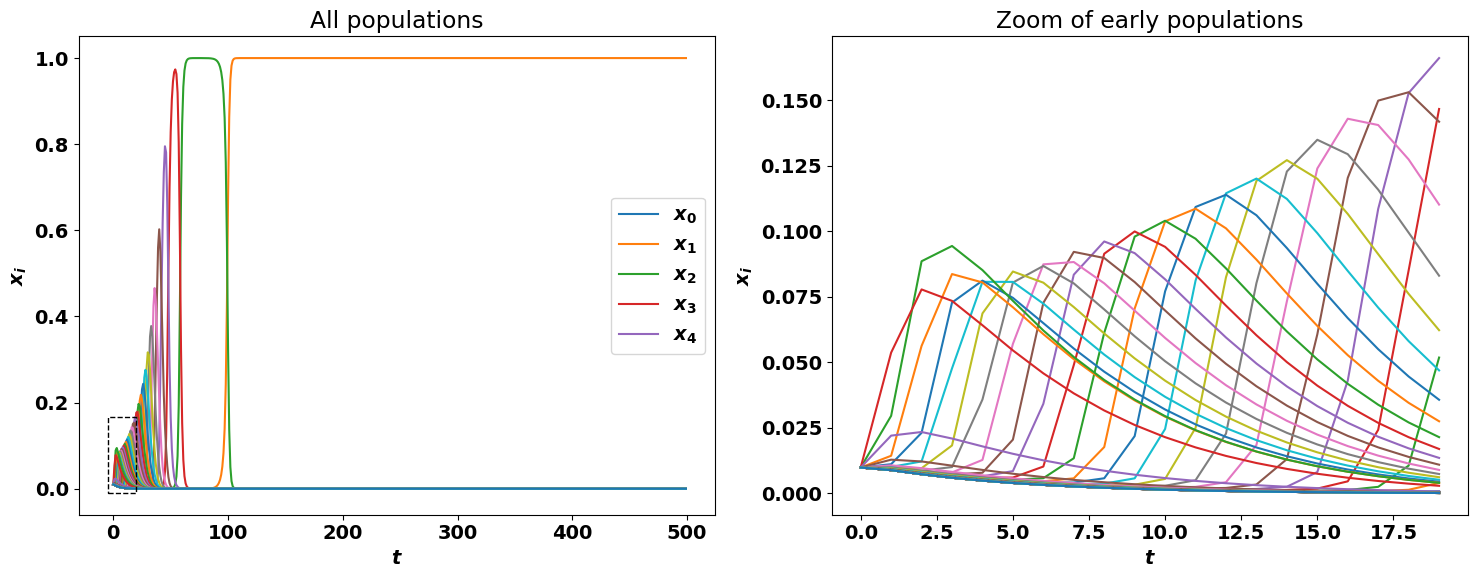

In [8]:
ts = np.linspace(0, 1_000, 500)
x = get_uniform_population(N=101)
xs = scipy.integrate.odeint(func=get_derivative, y0=x, t=ts)

zoom = 20
number_of_labelled_strategies = 5
zoom_box_width_offset = 5
zoom_box_height_offset = 0.01

fig, (ax_2, ax_1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
for i, x in enumerate(xs.T):
    if i < number_of_labelled_strategies:
        ax_1.plot(x[:zoom], label=f"$x_{{{i}}}$")
        ax_2.plot(x, label=f"$x_{{{i}}}$")
    else:
        ax_1.plot(x[:zoom])
        ax_2.plot(x)

ax_1.set_xlabel("$t$")
ax_2.set_xlabel("$t$")
ax_1.set_ylabel("$x_i$")
ax_2.set_ylabel("$x_i$")

ax_1.set_title("Zoom of early populations")
ax_2.set_title("All populations")

ax_2.add_patch(
    patches.Rectangle(
        xy=(-zoom_box_width_offset, -zoom_box_height_offset), 
        width=zoom + zoom_box_width_offset,
        height=xs[:zoom].max() + zoom_box_height_offset, 
        fc='none', 
        color="black", 
        linewidth=1, 
        linestyle="dashed",
        zorder=2,
    )
)
ax_2.legend()
fig.tight_layout()
fig.savefig("evolution.pdf", transparent=True)

## Effect of the starting population

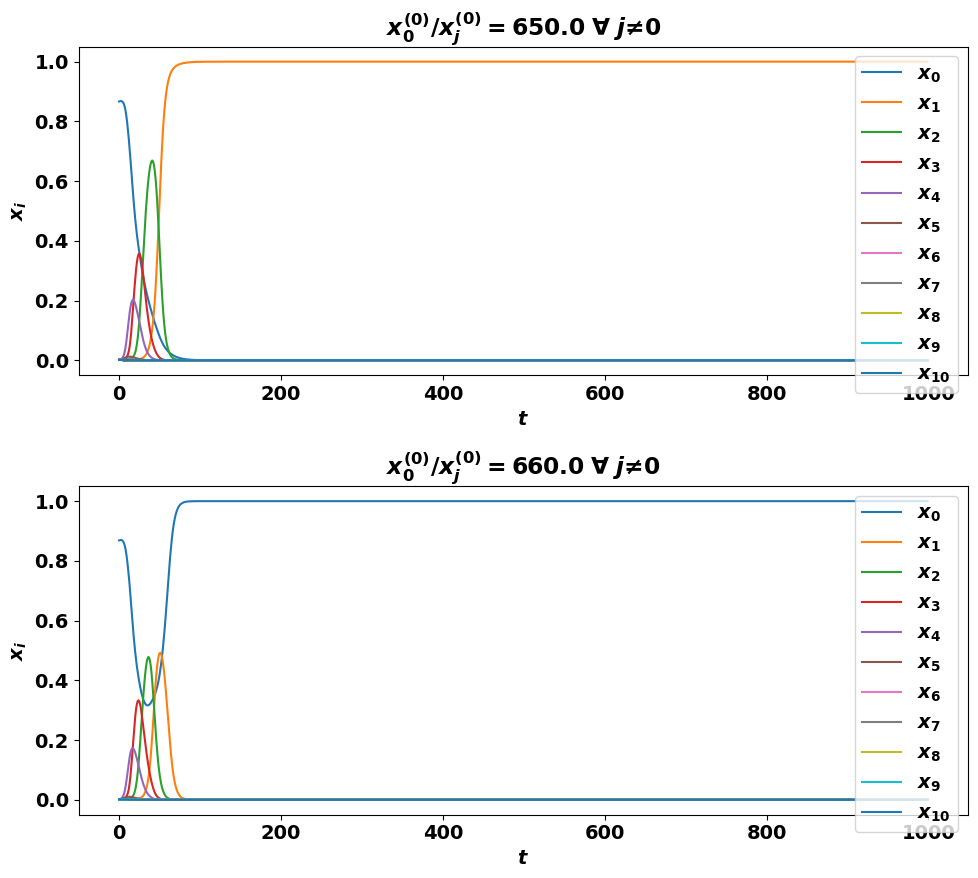

In [9]:
ts = np.linspace(0, 500, 1_000)


number_of_labelled_strategies = 11


initial_populations = []
for ratio in (650, 660):
    initial_x = np.ones(101)
    initial_x[0] = ratio
    initial_populations.append(initial_x / initial_x.sum())

fig, ax_array = plt.subplots(nrows=2, figsize=(10, 9))

for initial_x, ax in zip(initial_populations, ax_array):
    xs = scipy.integrate.odeint(func=get_derivative, y0=initial_x, t=ts)

    for i, x in enumerate(xs.T):
        if i < number_of_labelled_strategies:
            ax.plot(x, label=f"$x_{{{i}}}$")
        else:
            ax.plot(x)

    ax.set_xlabel("$t$")
    ax.set_ylabel("$x_i$")
    ax.set_title(f"$x_0^{{(0)}}/x_j^{{(0)}}={initial_x[0]/initial_x[1]}\;\\forall\;j\\ne0$")
    ax.legend()

fig.tight_layout();
fig.savefig("main.pdf", transparent=True)


# Discontinuity at $x=0$

In [10]:
x = np.array((0, 0, 0, 0,))

1 / (get_distance_from_two_thirds(x=x))

/var/folders/2p/gzkw2x1n7vb7g7p_c4d43vbw0000gp/T/ipykernel_7023/4284097527.py:3: RuntimeWarning: divide by zero encountered in divide
  1 / (get_distance_from_two_thirds(x=x))


array([       inf, 1.        , 0.25      , 0.11111111])

# Effect of the fitness function

$$
    f_i(x) = \delta_{i, \text{argmin}_i\left(i - \frac{2}{3}\sum_{i=0}^{N}ix_i\right) ^ 2}
$$

In [11]:
def get_alternate_fitness(x):            
    """
    Return the alternate fitness vector f_i
    """
    N = len(x)
    indices = np.arange(0, N)
    return (indices == np.argmin(get_distance_from_two_thirds(x))).astype(int)

In [12]:
x = np.array((1/3, 1/3, 1/3))
assert np.allclose(get_alternate_fitness(x), np.array([0, 1, 0]))

In [13]:
def get_alternate_derivative(x, t):
    """
    Return the derivative as defined by the replicator dynamics equation.
    """
    fitness = get_alternate_fitness(x=x)
    phi = np.sum(x * fitness)

    return x * (fitness - phi)

/Users/smavak/Library/Python/3.11/lib/python/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


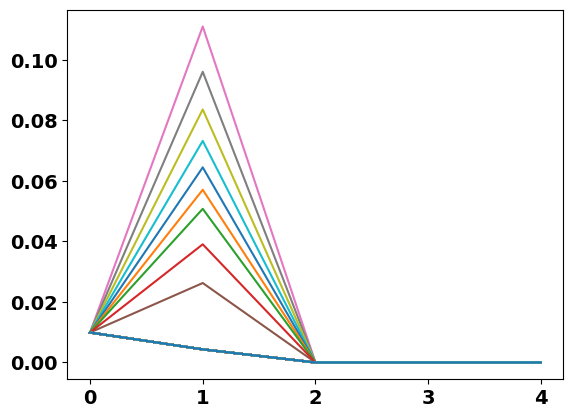

In [14]:
ts = np.linspace(0, 1_000, 5)
x = get_uniform_population(N=101)
xs = scipy.integrate.odeint(func=get_alternate_derivative, y0=x, t=ts)

plt.plot(xs);